In [ ]:
import pandas as pd
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv'
df = pd.read_csv(url)
df

In [ ]:
df.isnull().sum()
df = df.drop('Cabin', axis =1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.fillna(df.mean(), inplace= True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df['Embarked'].describe()
df['Embarked'].fillna('S', inplace= True)
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis = 1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [ ]:
df['Alone'] = [0 if df['FamilySize'][i] > 0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Alone
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997,0.135207
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512,0.179775
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138,-0.271832
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000,-0.690922
Alone,0.057462,-0.203367,0.135207,0.179775,-0.271832,-0.690922,1.000000


In [ ]:
mf_survived = df.groupby('Sex').sum()['Survived']
print(mf_survived)
total_pop = df['Sex'].value_counts()
print(total_pop)
probab_mf_survived = mf_survived / total_pop
print(probab_mf_survived)

Sex
female    233
male      109
Name: Survived, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
female    0.742038
male      0.188908
dtype: float64


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Sex')

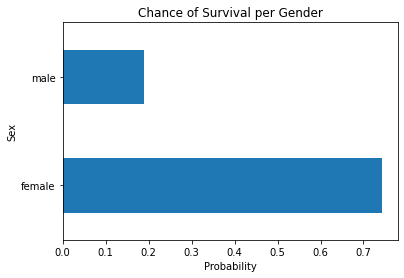

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

mf_survived_graph = probab_mf_survived.plot(kind = 'barh', title = 'Chance of Survival per Gender')
mf_survived_graph.set_xlabel('Probability')
mf_survived_graph.set_ylabel('Sex')

In [ ]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0, 0.5, 'Class')

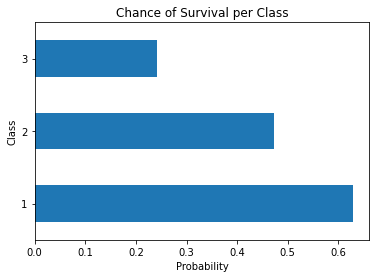

In [ ]:
class_survived_graph = df.groupby(['Pclass'])['Survived'].mean().plot(kind= 'barh', title= 'Chance of Survival per Class')
class_survived_graph.set_xlabel('Probability')
class_survived_graph.set_ylabel('Class')

In [ ]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

Text(0, 0.5, 'Alone')

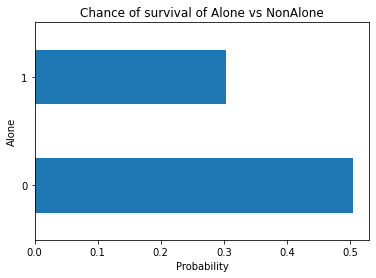

In [ ]:
alone_survived_graph = df.groupby(['Alone'])['Survived'].mean().plot(kind ='barh', title = 
                                                                     "Chance of survival of Alone vs NonAlone")
alone_survived_graph.set_xlabel('Probability')
alone_survived_graph.set_ylabel('Alone')

In [ ]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Text(0.5, 0, 'Probability')

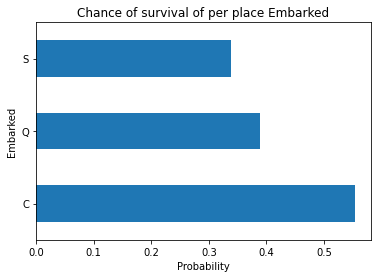

In [ ]:
embarked_survived_graph = df.groupby(['Embarked'])['Survived'].mean().plot(kind ='barh', title = "Chance of survival of per place Embarked")
embarked_survived_graph.set_xlabel('Probability')

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

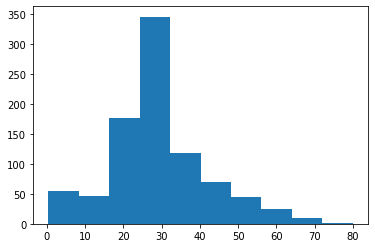

In [ ]:
plt.hist(data = df, x ='Age')

In [ ]:
df.groupby(['Embarked'])['Pclass'].mean()

Embarked
C    1.886905
Q    2.909091
S    2.346749
Name: Pclass, dtype: float64

##**Conclusion**

---


*   More number of Females survived compared to Males
*   People belonging in upper class survived twice more than people in lower class 
* People having family survived 3/5 times more than alone people
* People embarked at Cherbourg Port Survived the most then followed by Queenstown and Southampton
* Most people in the titanic were 24-32 aged and there were two people aged more than 72
* Most people in first class embarked from Cherbourg Port 


